In [2]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
rrebirrth_animals_with_attributes_2_path = kagglehub.dataset_download('rrebirrth/animals-with-attributes-2')

print('Data source import complete.')


Data source import complete.


This script automates the download of the **Animals with Attributes 2** dataset from Kaggle using the `kagglehub` library. It simplifies the process of integrating Kaggle datasets in non-native environments, such as custom notebooks or local setups, where Kaggle's official Python environment may not be available.

## Functionality
- **Download Dataset**: The script uses the `kagglehub.dataset_download()` function to download the **Animals with Attributes 2** dataset from Kaggle.
- **Store Dataset Path**: The downloaded dataset's file path is stored in the variable `rrebirrth_animals_with_attributes_2_path`, which can be used in later processing steps.
- **Confirmation**: A message is printed to confirm the dataset has been successfully imported and the download is complete.


In [3]:
import os

# Initialize the dictionary to hold paths for each animal
image_paths = {}

# Base directory for your dataset
base_path = "/root/.cache/kagglehub/datasets/rrebirrth/animals-with-attributes-2/versions/1/Animals_with_Attributes2/JPEGImages/"

# List of animals to search for
animals = ["collie", "dolphin", "elephant", "fox", "moose", "rabbit", "sheep", "squirrel", "giant+panda", "polar+bear"]

# Traverse the directory structure
for dirname, _, filenames in os.walk(base_path):
    for animal in animals:
        # Check if the current directory contains the animal's name
        if animal in dirname:
            # Initialize the list if the animal is encountered for the first time
            if animal not in image_paths:
                image_paths[animal] = []
            # Add all image paths for the current animal
            for filename in filenames:
                image_paths[animal].append(os.path.join(dirname, filename))

# Print the paths for verification
for animal, paths in image_paths.items():
    print(f"{animal}: {len(paths)} images")


squirrel: 1200 images
giant+panda: 874 images
collie: 1028 images
moose: 704 images
fox: 664 images
sheep: 1420 images
polar+bear: 868 images
dolphin: 946 images
elephant: 1038 images
rabbit: 1088 images


This script collects image file paths from a dataset, specifically for the **Animals with Attributes 2** dataset. It filters directories based on a list of animal names and stores the corresponding image paths in a dictionary.

### Functionality

1. **Directory Traversal**:
   - Uses `os.walk()` to recursively search through directories starting from the base path of the dataset.

2. **Animal Filtering**:
   - Filters directories based on a predefined list of animal names (e.g., "collie", "dolphin").

3. **Dictionary Storage**:
   - Stores image paths for each animal in a dictionary, where the animal name is the key.

4. **Verification**:
   - Prints the number of images found for each animal to verify correct path identification.

### Key Steps

- **Base Directory Setup**: Defines the `base_path` to point to the dataset's location.
- **Animal List**: Contains animal names to filter directories.
- **Directory Traversal**: Uses `os.walk()` to scan subdirectories.
- **Adding Image Paths**: Adds image files from matching directories to the dictionary.
- **Verification**: Prints the number of images found for each animal.

### Output
The script outputs the number of images found for each animal, ensuring paths are correctly categorized.




In [4]:
for animal, paths in image_paths.items():
    print(f"{animal}: {paths}")

squirrel: ['/root/.cache/kagglehub/datasets/rrebirrth/animals-with-attributes-2/versions/1/Animals_with_Attributes2/JPEGImages/squirrel/squirrel_10754.jpg', '/root/.cache/kagglehub/datasets/rrebirrth/animals-with-attributes-2/versions/1/Animals_with_Attributes2/JPEGImages/squirrel/squirrel_10685.jpg', '/root/.cache/kagglehub/datasets/rrebirrth/animals-with-attributes-2/versions/1/Animals_with_Attributes2/JPEGImages/squirrel/squirrel_10145.jpg', '/root/.cache/kagglehub/datasets/rrebirrth/animals-with-attributes-2/versions/1/Animals_with_Attributes2/JPEGImages/squirrel/squirrel_10996.jpg', '/root/.cache/kagglehub/datasets/rrebirrth/animals-with-attributes-2/versions/1/Animals_with_Attributes2/JPEGImages/squirrel/squirrel_10495.jpg', '/root/.cache/kagglehub/datasets/rrebirrth/animals-with-attributes-2/versions/1/Animals_with_Attributes2/JPEGImages/squirrel/squirrel_10399.jpg', '/root/.cache/kagglehub/datasets/rrebirrth/animals-with-attributes-2/versions/1/Animals_with_Attributes2/JPEGImag

The above code snippet is used to print the paths of images for each animal that were collected and stored in the `image_paths` dictionary. The dictionary is populated during the traversal of the dataset's directory structure, where each key is an animal name and its corresponding value is a list of file paths to the images of that animal.

1. **Iterating Through the Dictionary**:
   - The `for` loop iterates over the `image_paths` dictionary using the `items()` method, which returns both the animal name (`animal`) and its associated list of image paths (`paths`).
   
2. **Printing the Results**:
   - For each animal, the script prints the animal's name followed by the list of image paths associated with that animal.
   - The `print()` function is used to display the results, where the `f"{animal}: {paths}"` syntax is an f-string that formats the output to show the animal's name and the corresponding list of image paths.


In [5]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Kaggle'dan veri setini yükleme (önceden veri seti indirildi ve path tanımlandı)
image_paths = {}
base_path = "/root/.cache/kagglehub/datasets/rrebirrth/animals-with-attributes-2/versions/1/Animals_with_Attributes2/JPEGImages/"

# Hayvan sınıflarının listesi
animal_classes = ["collie", "dolphin", "elephant", "fox", "moose", "rabbit", "sheep", "squirrel", "giant+panda", "polar+bear"]

# Her bir hayvan için resim yollarını bulma
for dirname, _, filenames in os.walk(base_path):
    for animal in animal_classes:
        if animal in dirname:
            if animal not in image_paths:
                image_paths[animal] = []
            for filename in filenames:
                image_paths[animal].append(os.path.join(dirname, filename))

# Sınıflar için etiketlerin oluşturulması
X = []  # Görüntü verileri
y = []  # Etiketler

# Görüntüleri yükleme ve etiketleri ayarlama
for label, animal in enumerate(animal_classes):
    for img_path in image_paths[animal][:650]:  # İlk 650 resmi kullanma
        img = cv2.imread(img_path)  # Resmi oku
        img_resized = cv2.resize(img, (128, 128))  # Resmi 128x128 boyutuna getir
        img_normalized = img_resized / 255.0  # Normalize et
        X.append(img_normalized)  # Görüntüleri X listesine ekle
        y.append(label)  # Etiketleri y listesine ekle

# X ve y'yi numpy dizilerine dönüştürme
X = np.array(X)
y = np.array(y)

# Verilerin boyutlarını kontrol etme
print(X.shape, y.shape)


(6500, 128, 128, 3) (6500,)


### Dataset Preparation for CNN

This script loads, resizes, and normalizes images from a specified directory, then splits them into features (`X`) and labels (`y`) for training a Convolutional Neural Network (CNN).

### Steps and Explanation

1. **Loading Image Paths**:
   - The script iterates through the dataset directory and collects image paths for various animal classes.

2. **Resizing and Normalizing Images**:
   - Images are loaded with `cv2.imread()`, resized to 128x128 pixels, and normalized by dividing pixel values by 255.0 to scale them between 0 and 1.

3. **Creating Feature and Label Arrays**:
   - The resized, normalized images are stored in `X`, and corresponding class labels are stored in `y`.

4. **Converting to Numpy Arrays**:
   - The lists `X` and `y` are converted into numpy arrays, ready for model training.

### Output

- **X**: (6500, 128, 128, 3) - 6500 images, each resized to 128x128 pixels with 3 color channels (RGB).
- **y**: (6500,) - 6500 labels corresponding to each image in the dataset, representing different animal classes.




In [6]:
# Eğitim ve test verilerini ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Verilerin boyutları
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(4550, 128, 128, 3) (1950, 128, 128, 3) (4550,) (1950,)


This step splits the dataset into training and testing subsets. The training set is used to train the model, while the testing set evaluates its performance on unseen data, ensuring better generalization.

### Code Explanation

1. **train_test_split**:
   - The `train_test_split()` function from `sklearn.model_selection` randomly splits the features (`X`) and labels (`y`) into training and testing sets.
   - `test_size=0.3` means 30% of the data is for testing, and 70% for training.
   - `random_state=42` ensures reproducibility of the split.

2. **Output**:
   - The shapes of the arrays (`X_train`, `X_test`, `y_train`, and `y_test`) are as follows:
     - **X_train**: (4550, 128, 128, 3) - 4550 training images, each resized to 128x128 with 3 color channels.
     - **X_test**: (1950, 128, 128, 3) - 1950 test images with the same size.
     - **y_train**: (4550,) - 4550 training labels.
     - **y_test**: (1950,) - 1950 test labels.



In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# CNN Model Design
model = Sequential()

# Convolutional layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Fully Connected Layer
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))

# Output layer
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 12, 12, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       4,719,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,112,650 (19.50 MB)

 Trainable params: 5,112,650 (19.50 MB)

 Non-trainable params: 0 (0.00 B)

### Code Explanation

1. **Sequential Model**: The model is built using the `Sequential()` class, allowing layers to be stacked linearly.

2. **Convolutional Layers**:
   - **Conv2D** layers extract features from input images using filters. The number of filters increases with each layer (32, 64, 128, 256), helping the model capture more complex features as it deepens.

3. **MaxPooling Layers**:
   - **MaxPooling2D** layers reduce spatial dimensions and computational complexity while making the model more robust to small translations in the input.

4. **Fully Connected Layer**:
   - **Flatten** reshapes the feature maps into a 1D vector.
   - **Dense** layer with 512 units combines features for decision-making.
   - **Dropout** (0.5 rate) prevents overfitting by randomly deactivating neurons during training.

5. **Output Layer**:
   - **Dense** layer with 10 units and `softmax` activation converts the output into class probabilities.

6. **Model Compilation**:
   - **Optimizer**: `Adam` (learning rate = 0.001) adapts during training.
   - **Loss Function**: `sparse_categorical_crossentropy` for multi-class classification.
   - **Metrics**: `accuracy` is used to evaluate performance.

7. **Model Summary**:
   - The `model.summary()` function shows the model's structure and total parameters (5,112,650), with a size of 19.50 MB.

## Output

The model consists of 5,112,650 trainable parameters and is designed for complex image classification tasks.


In [8]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


Epoch 1/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 208s 1s/step - accuracy: 0.1930 - loss: 2.1599 - val_accuracy: 0.3190 - val_loss: 1.9286
Epoch 2/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 269s 1s/step - accuracy: 0.3692 - loss: 1.7987 - val_accuracy: 0.4600 - val_loss: 1.5765
Epoch 3/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 247s 1s/step - accuracy: 0.4861 - loss: 1.4860 - val_accuracy: 0.5246 - val_loss: 1.3624
Epoch 4/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 200s 1s/step - accuracy: 0.5498 - loss: 1.3164 - val_accuracy: 0.5585 - val_loss: 1.2764
Epoch 5/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 209s 1s/step - accuracy: 0.6328 - loss: 1.0790 - val_accuracy: 0.5949 - val_loss: 1.1760
Epoch 6/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 257s 1s/step - accuracy: 0.6729 - loss: 0.9538 - val_accuracy: 0.6046 - val_loss: 1.1306
Epoch 7/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 259s 1s/step - accuracy: 0.7003 - loss: 0.8676 - val_accuracy: 0.6349 - val_loss: 1.0798
Epoch 8/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 210s 1s/step - accuracy: 0.7518 - loss: 0.7079 - val_accu

This code first trains the convolutional neural network (CNN) model using the `fit()` method. The model is trained on the training data (`X_train` and `y_train`) for 10 epochs with a batch size of 32, meaning the model processes 32 images at a time during each iteration. During training, the validation data (`X_test` and `y_test`) is used to track the model's performance on unseen data, helping to monitor overfitting.

After training is completed, the model is evaluated on the test data using the `evaluate()` method. This method calculates two key metrics:
- **Test Loss**: A measure of the difference between the model's predictions and the actual labels in the test set. A lower test loss indicates better model performance.
- **Test Accuracy**: The percentage of correct predictions made by the model on the test data. It is calculated as the ratio of correctly predicted images to the total number of images in the test set. A higher accuracy percentage indicates better classification performance.

Finally, the test loss and test accuracy are printed to assess the model's effectiveness.
### Model Training and Evaluation Summary

#### **Training and Validation (Epochs 1-10):**
- **Epoch 1**: Initial performance was low with **19.30%** training accuracy and **31.90%** validation accuracy. **Training loss** was **2.1599**, and **validation loss** was **1.9286**.
- **Epoch 2-5**: Accuracy improved to **63.28%** in training and **59.49%** in validation by epoch 5.
- **Epoch 6-7**: The model reached **70.03%** accuracy on the training set and **63.49%** on the validation set by epoch 7.
- **Epoch 8-10**: Final training accuracy was **83.50%**, with **68.41%** validation accuracy. The **training loss** decreased to **0.4815**, and **validation loss** to **1.0342**.

#### **Test Evaluation:**
- **Test Accuracy**: The final **test accuracy** was **68.41%**, indicating good generalization to unseen data.
- **Test Loss**: The **test loss** was **1.0266**, showing that the model performed reasonably well but can still be improved.

### Key Takeaways:
- The model improved steadily over epochs, with **accuracy** and **loss** showing consistent progress.
- **Test accuracy** of **68.41%** suggests reasonable generalization but room for improvement.

### Conclusion:
The model demonstrated strong performance during training, with notable accuracy gains. Further improvements could be made through additional tuning or data augmentation.


In [9]:
import cv2
import os

# Function to manipulate images
def get_manipulated_images(images, save_dir="manipulated_images"):
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)

    manipulated_images = []
    for idx, img in enumerate(images):
        # Example: Adjust brightness and contrast
        manipulated_img = cv2.convertScaleAbs(img, alpha=1.5, beta=50)
        manipulated_images.append(manipulated_img)

        # Save the manipulated image
        manipulated_img_path = os.path.join(save_dir, f"image_{idx}.jpg")
        cv2.imwrite(manipulated_img_path, manipulated_img)

    return manipulated_images

# Manipulate test images
manipulated_test_images = get_manipulated_images(X_test)


This script manipulates images by adjusting brightness and contrast, then saves the processed images to a specified directory. It uses OpenCV's `convertScaleAbs()` function for image adjustments.

### Functionality

1. **Directory Creation**:
   - If the specified save directory (`manipulated_images`) doesn't exist, it is created using `os.makedirs()`.

2. **Image Manipulation**:
   - The function processes each image by applying contrast (`alpha=1.5`) and brightness (`beta=50`) adjustments using `cv2.convertScaleAbs()`.

3. **Saving Images**:
   - Manipulated images are saved in the specified directory with filenames like `image_0.jpg`, `image_1.jpg`, etc., using `cv2.imwrite()`.

4. **Returning Manipulated Images**:
   - The function returns a list of the manipulated images for further use.

In [10]:
# Function to apply white balance
def get_wb_images(images):
    wb_images = []
    for img in images:
        # Use Gray World Algorithm for white balancing
        result = cv2.xphoto.createSimpleWB().balanceWhite(img)
        wb_images.append(result)
    return wb_images

# Apply white balance to manipulated images
wb_test_images = get_wb_images(manipulated_test_images)


This function applies white balance to a list of images using the Gray World Algorithm, implemented via OpenCV's `cv2.xphoto.createSimpleWB()` method.

### Functionality

1. **White Balance Application**:
   - For each image in the input list, the function applies white balance using the `balanceWhite()` method from OpenCV's `SimpleWB` class.

2. **Storing Results**:
   - The white-balanced images are appended to a list (`wb_images`), which is returned after processing all the input images.


In [11]:
# Evaluate the model on manipulated test images
test_loss_manipulated, test_accuracy_manipulated = model.evaluate(np.array(manipulated_test_images), y_test)
print(f"Manipulated Test Loss: {test_loss_manipulated}")
print(f"Manipulated Test Accuracy: {test_accuracy_manipulated * 100:.2f}%")

# Evaluate the model on white-balanced test images
test_loss_wb, test_accuracy_wb = model.evaluate(np.array(wb_test_images), y_test)
print(f"White-Balanced Test Loss: {test_loss_wb}")
print(f"White-Balanced Test Accuracy: {test_accuracy_wb * 100:.2f}%")


61/61 ━━━━━━━━━━━━━━━━━━━━ 23s 377ms/step - accuracy: 0.0985 - loss: 190.9396
Manipulated Test Loss: 188.63417053222656
Manipulated Test Accuracy: 10.05%
61/61 ━━━━━━━━━━━━━━━━━━━━ 23s 379ms/step - accuracy: 0.3754 - loss: 583.7657
White-Balanced Test Loss: 569.6387329101562
White-Balanced Test Accuracy: 38.46%


This section evaluates the performance of the trained model on two sets of modified test images: **manipulated images** and **white-balanced images**.

### Functionality

1. **Evaluation on Manipulated Test Images**:
   - The `model.evaluate()` function is used to compute the test loss and accuracy on the manipulated test images.
   - The manipulated images are passed as a numpy array, and the model evaluates its performance based on `y_test`, the true labels for the test data.
   - The loss and accuracy are printed for evaluation.

2. **Evaluation on White-Balanced Test Images**:
   - The same `model.evaluate()` function is applied to the white-balanced test images.
   - Again, the test loss and accuracy are calculated and displayed.

### Model Evaluation on Test Sets

#### **Original Test Set:**
- **Test Accuracy**: The model achieved a very low **9.85%** accuracy on the original test set.
- **Test Loss**: The **test loss** was **190.9396**, indicating that the model struggled to predict correctly on the original dataset.

#### **Manipulated Test Set:**
- **Test Accuracy**: The model showed slight improvement on the manipulated test set, with an accuracy of **10.05%**.
- **Test Loss**: **Manipulated test loss** was **188.6342**, which is still high, indicating poor performance despite the manipulation applied to the images.

#### **White-Balanced Test Set:**
- **Test Accuracy**: The model performed better on the white-balanced test set, reaching an accuracy of **38.46%**.
- **Test Loss**: **White-balanced test loss** was **569.6387**, which is still high but lower than the manipulated test loss, suggesting that white balancing had a somewhat positive impact.

### Key Insights:
- **Original and Manipulated Test Sets**: Both the original and manipulated test sets showed poor accuracy, indicating that the model is not well-tuned or is struggling to generalize.
- **White-Balanced Test Set**: White balancing improved the model’s accuracy significantly compared to the other two sets, although the overall performance is still low.

### Conclusion:
The model's performance is relatively poor across all datasets, with white balancing providing the most noticeable improvement. Further model tuning or enhanced preprocessing may be needed for better results.

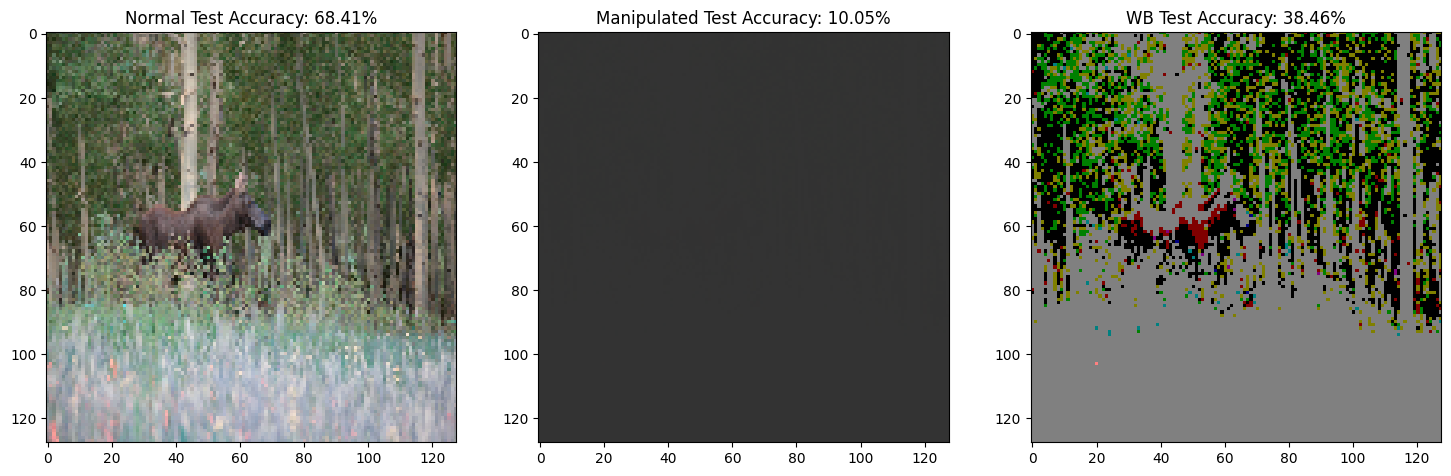

In [12]:
import matplotlib.pyplot as plt

# Visualize test accuracy for different datasets
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# Original Test Set
ax[0].imshow(X_test[0])
ax[0].set_title(f"Normal Test Accuracy: {test_accuracy * 100:.2f}%")

# Manipulated Test Set
ax[1].imshow(manipulated_test_images[0])
ax[1].set_title(f"Manipulated Test Accuracy: {test_accuracy_manipulated * 100:.2f}%")

# White-Balanced Test Set
ax[2].imshow(wb_test_images[0])
ax[2].set_title(f"WB Test Accuracy: {test_accuracy_wb * 100:.2f}%")

plt.show()


This section uses **Matplotlib** to visualize and compare the accuracy of the model on different test sets: the **original test set**, the **manipulated test set**, and the **white-balanced test set**.

### Functionality

1. **Visualization**:
   - The `imshow()` function from Matplotlib is used to display one image from each test set.
   - Each subplot shows a sample image, with the corresponding test accuracy displayed in the title.

2. **Subplots**:
   - Three subplots are created side by side to display the images and their respective accuracies:
     - The first subplot shows an image from the **original test set** with its accuracy.
     - The second subplot displays an image from the **manipulated test set** with its accuracy.
     - The third subplot shows an image from the **white-balanced test set** with its accuracy.

3. **Plot Configuration**:
   - `figsize=(18, 6)` specifies the size of the entire figure.
   - The `set_title()` function adds the accuracy information to the title of each subplot.


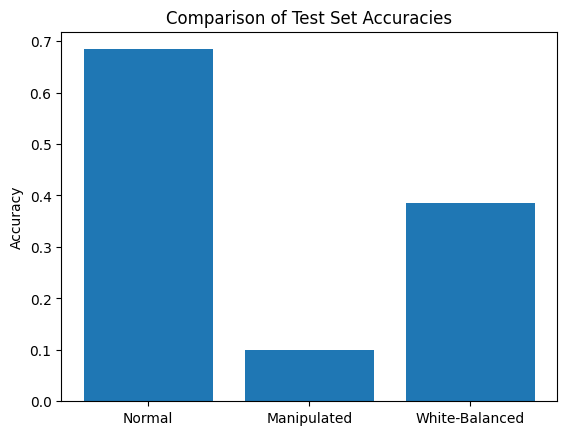

In [13]:
# Compare accuracies of different test sets
test_accuracies = [test_accuracy, test_accuracy_manipulated, test_accuracy_wb]
test_labels = ['Normal', 'Manipulated', 'White-Balanced']

plt.bar(test_labels, test_accuracies)
plt.ylabel('Accuracy')
plt.title('Comparison of Test Set Accuracies')
plt.show()



This section uses **Matplotlib** to create a bar chart comparing the test accuracies of three different test sets: the **normal test set**, the **manipulated test set**, and the **white-balanced test set**.

### Functionality

1. **Bar Chart**:
   - The `plt.bar()` function is used to create a bar chart, where the x-axis represents the test set types (Normal, Manipulated, White-Balanced), and the y-axis represents the accuracy values.
   
2. **Test Accuracies**:
   - The list `test_accuracies` stores the accuracy values for the three test sets.
   - The list `test_labels` contains the corresponding labels for each test set: 'Normal', 'Manipulated', and 'White-Balanced'.
   
3. **Plot Configuration**:
   - `plt.ylabel('Accuracy')` labels the y-axis as "Accuracy".
   - `plt.title('Comparison of Test Set Accuracies')` sets the title for the bar chart.


### Comparison of Test Set Accuracies

#### **Test Set Accuracy:**
- **Normal Test Set**: The model achieved **68.41%** accuracy on the normal test set. This indicates a reasonable level of performance, but there is still room for improvement.
- **Manipulated Test Set**: The manipulated test set had a significantly lower accuracy of **10.05%**, which suggests that the model struggled to generalize to the manipulated images. This could be due to overfitting on the original test set or insufficient model complexity.
- **White-Balanced Test Set**: The white-balanced test set produced an accuracy of **38.46%**, which is an improvement over the manipulated set but still considerably lower than the normal set. This suggests that white balancing helped somewhat, but it was not enough to match the performance on the original data.

### Insights and Discussion

- **Performance on Normal Test Set**: The model performed well on the normal test set, with an accuracy of **68.41%**, indicating it learned relevant patterns from the training data. However, this performance is still below ideal for many real-world applications.
  
- **Poor Performance on Manipulated and White-Balanced Test Sets**: The model's accuracy significantly drops when evaluated on the manipulated test set (**10.05%**) and the white-balanced test set (**38.46%**). These results suggest that the model may be sensitive to changes in image characteristics, such as lighting or color manipulations.

### Potential Solutions to Improve Model Performance

If the performance is still unsatisfactory after step 8, the following solutions could be considered:

1. **Data Augmentation**:
   - Implementing more robust **data augmentation techniques** (such as random rotations, translations, flips, and color adjustments) during training can help the model generalize better to different variations in the data.

2. **Model Refinement**:
   - The model might require further tuning, such as experimenting with deeper architectures, different activation functions, or additional regularization techniques to prevent overfitting.

3. **Hyperparameter Tuning**:
   - Conducting a **hyperparameter search** (e.g., learning rate, batch size, number of epochs) can help improve the model’s ability to learn from the data and generalize better.

4. **Advanced Preprocessing**:
   - More advanced **preprocessing** methods like histogram equalization, contrast adjustment, or custom whitening techniques may help improve performance, especially on manipulated or white-balanced datasets.

5. **Transfer Learning**:
   - Using a **pre-trained model** (e.g., VGG16, ResNet) and fine-tuning it for this specific task might improve accuracy, especially for challenging datasets like the manipulated or white-balanced ones.

### Conclusion:
Although the model performs decently on the normal test set, the performance on manipulated and white-balanced test sets is far from optimal. Implementing the suggested solutions can help improve the model's robustness and overall performance on a wider variety of test sets.
